In [30]:
from sarfusion.data.wisard import WiSARDDataset
from torchvision import transforms
from einops import rearrange
import numpy as np
import torch
import cv2
import lovely_tensors as lt
import torch.nn.functional as F
import torchvision.transforms.functional as tvF
lt.monkey_patch()

In [1]:
def draw_bbox_yolo(image, bboxes, color=(0, 255, 0), thickness=2):
    """
    Draw bounding boxes on an image given bounding box coordinates in YOLO format.
    
    Args:
    - image: numpy array representing the image
    - bboxes: list of bounding box coordinates in YOLO format (center_x, center_y, width, height)
    - color: color of the bounding box (BGR format)
    - thickness: thickness of the bounding box lines
    
    Returns:
    - image with bounding boxes drawn
    """
    image = rearrange(image, 'c h w  -> h w c')
    color = torch.tensor(color, device=image.device).float() / 255
    
    height, width = image.shape[:2]
    for bbox in bboxes:
        cls, center_x, center_y, w, h = bbox
        left = int(center_x * width - w * width / 2)
        top = int(center_y * height - h * height / 2)
        right = int(center_x * width + w * width / 2)
        bottom = int(center_y * height + h * height / 2)
        
        # Drawing bounding box
        image[top:bottom, left:left+thickness] = color
        image[top:bottom, right-thickness:right] = color
        image[top:top+thickness, left:right] = color
        image[bottom-thickness:bottom, left:right] = color
        
    image = rearrange(image, 'h w c -> c h w')
    
    return image

In [10]:

vis_transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

ir_transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


wisard = WiSARDDataset(
    root="dataset/WiSARD",
    folders=[
        "200505_Bellingham_Mavic_Mini_VIS_0015",
        "200505_Bellingham_Mavic_Mini_VIS_0016",
        "200910_Carnation_FLIR_IR_3",
        "200910_Carnation_FLIR_IR_4",
        ("210924_FHL_Enterprise_VIS_0134", "210924_FHL_Enterprise_IR_0135"),
        ("210924_FHL_Enterprise_VIS_0401", "210924_FHL_Enterprise_IR_0402"),
    ],
    transform=vis_transform,
    ir_transform=ir_transform,
)

In [11]:
data_dict = wisard[-1]

In [46]:
data_dict.target

[[5, 0.895312, 0.066667, 0.0625, 0.135185],
 [5, 0.634375, 0.074074, 0.045312, 0.15]]

In [43]:
img = data_dict.images.clone()
rgb = img[:3]

# Draw bounding boxes on the image
rgb = draw_bbox_yolo(rgb, data_dict.target, color=(0, 255, 0), thickness=2)

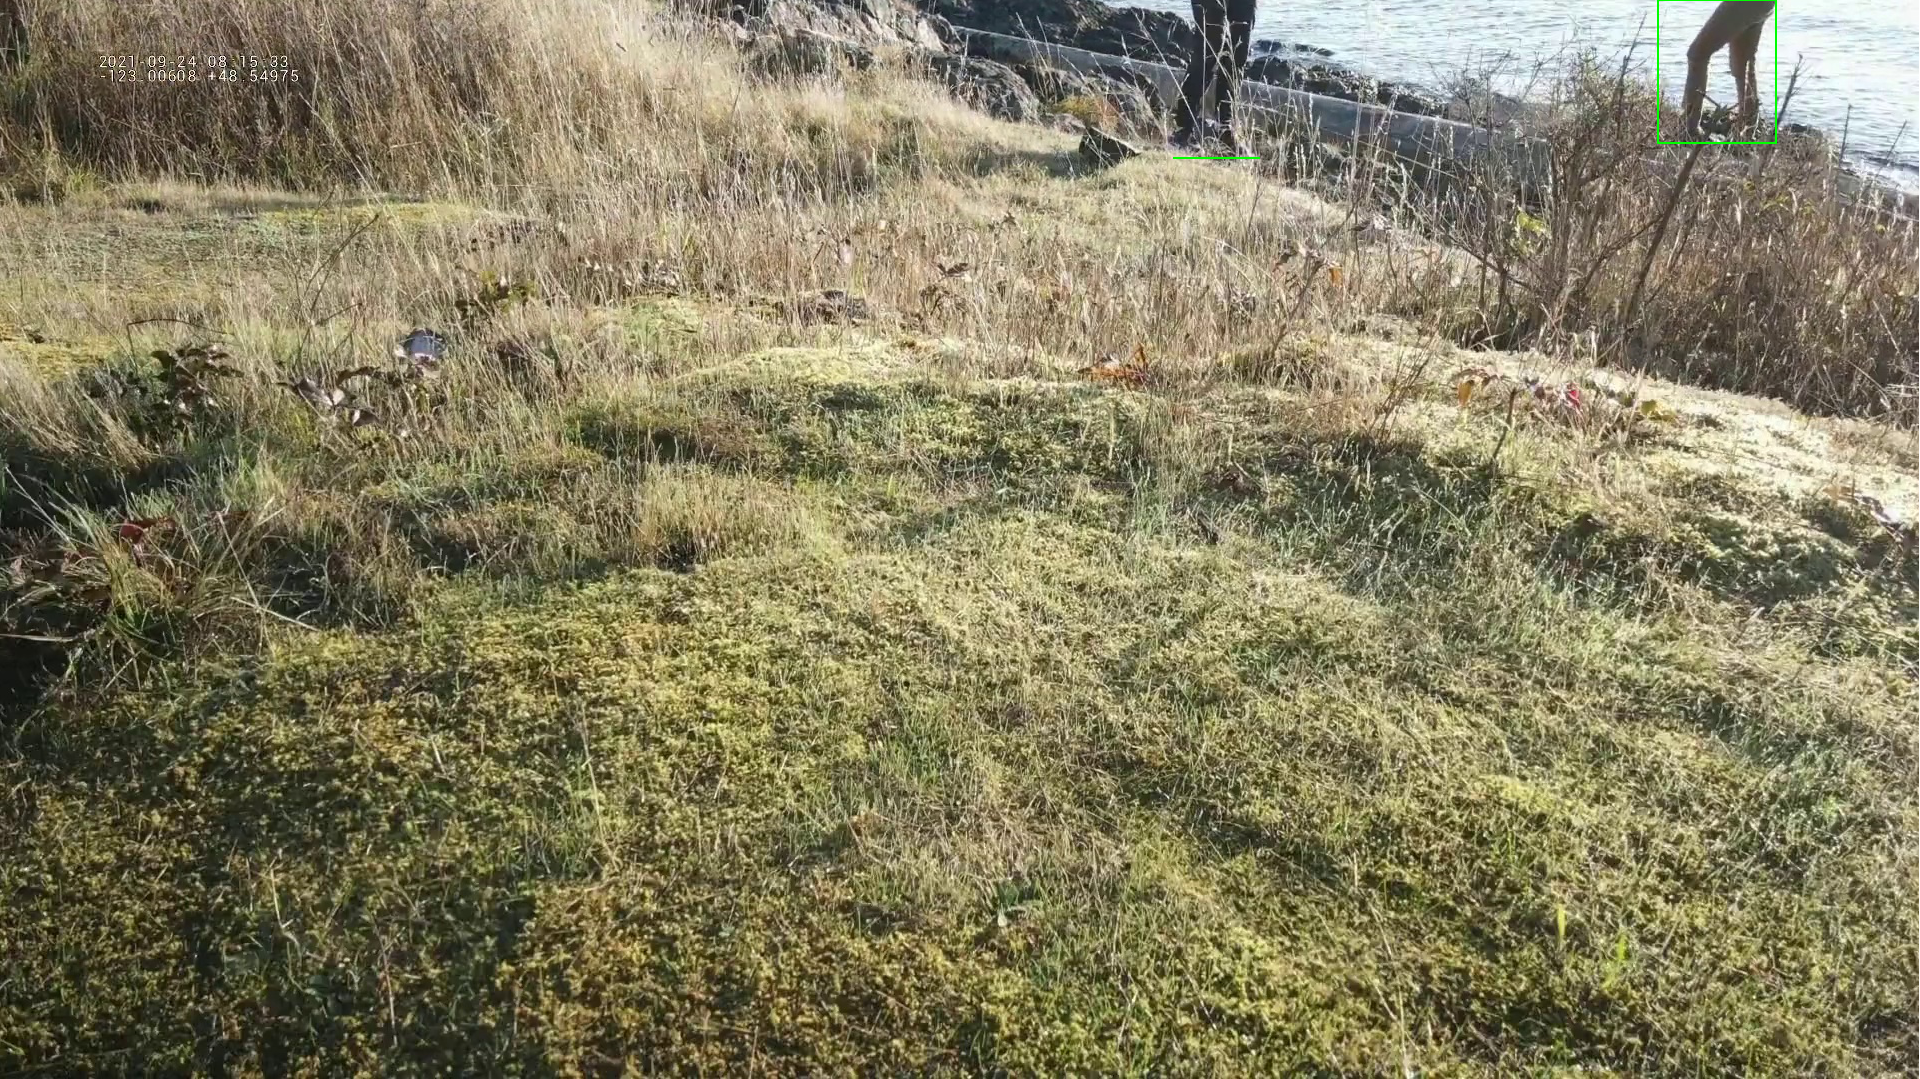

In [44]:
rgb.rgb